In [2]:
#importing neccessary packages
import tweepy
import re
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import pandas as pd
import networkx as nx
import community

In [29]:
#connecting to twiiter with the twitter api
consumer_key = 'HTwKYzhW3mtncK1YBz4HW2pEh'
consumer_secret = 'vMmWPWVnCPv6pO9bRkHvcwnrWylB0XWXIE65k6GcpdmwfpVjwU'
access_token = '1118074022309183488-6parMHAaMpLXdnW6hzV4Vm0LlWRjf1'
access_token_secret = 'Ei8XcqliZVbzjQZGHrXRexqWouVx68Cx8pCbadxWvAYpr'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [30]:
#function to get the latest list of tweets and there information for a given keyword
def get_tweets(listOfTweets, keyword, numOfTweets):
    # Iterate through all tweets containing the given word, api search mode
    for tweet in tweepy.Cursor(api.search, q=keyword).items(numOfTweets):
        # Add tweets in this format
        dict_ = {'Screen Name': tweet.user.screen_name,
                'User Name': tweet.user.name,
                'Tweet Created At': tweet.created_at,
                'Tweet Text': tweet.text,
                'User Location':tweet.user.location,
                 'User id':tweet.user.id,
                'Tweet Coordinates': tweet.coordinates,
                'Retweet Count': tweet.retweet_count,
                'tweet id': tweet.id,
                'Retweeted': tweet.retweeted,
                'Phone Type': tweet.source,
                'Favorite Count': tweet.favorite_count,
                'Favorited': tweet.favorited,
                'Replied': tweet.in_reply_to_status_id_str
                }
        listOfTweets.append(dict_)   
    return listOfTweets

In [31]:
#calling the above function to get the list of tweets based on keyword datascience
listofTweets=[]
get_tweets(listofTweets,'data science',50)

[{'Screen Name': 'Shujian_Liu',
  'User Name': 'Shujian 🍱',
  'Tweet Created At': datetime.datetime(2019, 5, 16, 5, 10, 17),
  'Tweet Text': "RT @MSFTResearch: “We've written this book to cover the theory we expect to be useful in the next 40 years, just as an understanding of aut…",
  'User Location': 'Boston, MA',
  'User id': 1979318286,
  'Tweet Coordinates': None,
  'Retweet Count': 338,
  'tweet id': 1128890389161795585,
  'Retweeted': False,
  'Phone Type': 'Twitter for iPad',
  'Favorite Count': 0,
  'Favorited': False,
  'Replied': None},
 {'Screen Name': 'KalixOrtega',
  'User Name': 'Kalix Enrique Ortega Rodriguez',
  'Tweet Created At': datetime.datetime(2019, 5, 16, 5, 10, 13),
  'Tweet Text': 'RT @Datascience__: Ethics and Data Science https://t.co/dUXwfekpuG  #datascience #ad',
  'User Location': 'Cuba',
  'User id': 1089974730772353025,
  'Tweet Coordinates': None,
  'Retweet Count': 1,
  'tweet id': 1128890373064011776,
  'Retweeted': False,
  'Phone Type': 'Twitter fo

In [32]:
#below is the function to create the nodes and egdes for given person name and max nodes   
def node_edges(main_person,max_edges):
    user_node=[]
    friend_node=[]
    friend_node1=[]
    friend_node2=[]
    friend_node3=[]
    max_edges=max_edges
    if len(api.friends_ids(screen_name=main_person))>=max_edges:
        no_of_nodes=max_edges
    else:
        no_of_nodes=len(api.friends_ids(screen_name=main_person))
    ids1=[]
    for page in tweepy.Cursor(api.friends_ids, screen_name=main_person,count=no_of_nodes).pages(1):
        for k in range(no_of_nodes):
            user_node.append(main_person)
        ids1.extend(page)
        for i in ids1:
            user = api.get_user(i)
            friend_node1.append(user.screen_name)
            friend_node.append(user.screen_name)
    for z in range(len(friend_node1)):
        if len(api.friends_ids(screen_name=friend_node1[z]))>=max_edges:
            no_of_nodes=max_edges
        else:
            no_of_nodes=len(api.friends_ids(screen_name=friend_node1[z]))
        ids2 = []
        for page in tweepy.Cursor(api.friends_ids, screen_name=friend_node1[z],count=no_of_nodes).pages(1):
            for k in range(no_of_nodes):
                user_node.append(friend_node1[z])
            ids2.extend(page)
            for i in ids2:
                user = api.get_user(i)
                friend_node2.append(user.screen_name)
                friend_node.append(user.screen_name)
    for r in range(len(friend_node2)):
        if len(api.friends_ids(screen_name=friend_node2[r]))>=max_edges:
            no_of_nodes=max_edges
        else:
            no_of_nodes=len(api.friends_ids(screen_name=friend_node2[r]))
        ids3 = []
        for page in tweepy.Cursor(api.friends_ids, screen_name=friend_node2[r],count=no_of_nodes).pages(1):
            for k in range(no_of_nodes):
                user_node.append(friend_node2[r])
            ids3.extend(page)
            for i in ids3:
                user = api.get_user(i)
                friend_node3.append(user.screen_name)
                friend_node.append(user.screen_name)
    return user_node,friend_node

    
    
        
    

In [33]:
#calling the above function for person name kiru and creating nodes and edges
max_edges=3
#listofTweets[2]['Screen Name']#listofTweets[2]['Screen Name'] replace it inplace of 'kiru' if you want based on keyword search second person person who tweeted on data science.
main_person='kiru'
user_node,friend_node=node_edges(main_person,max_edges)

Rate limit reached. Sleeping for: 871


In [37]:
#saving the nodes and edges into a txt file 
#give the computer location where the file should be stored
import csv
with open("C:/Users/akhil/Downloads/nodes_finally123.txt", 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerows(list(zip(user_node, friend_node)))


In [3]:
#importing the above txt file and convert it to a network graph
G_fb = nx.read_edgelist("C:/Users/akhil/Downloads/nodes_finally123.txt", create_using = nx.Graph())

In [4]:
#Quick snapshot of the Network
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 37
Number of edges: 36
Average degree:   1.9459


In [5]:
#creating a spring layout for displaying the network graph
spring_pos = nx.spring_layout(G_fb)

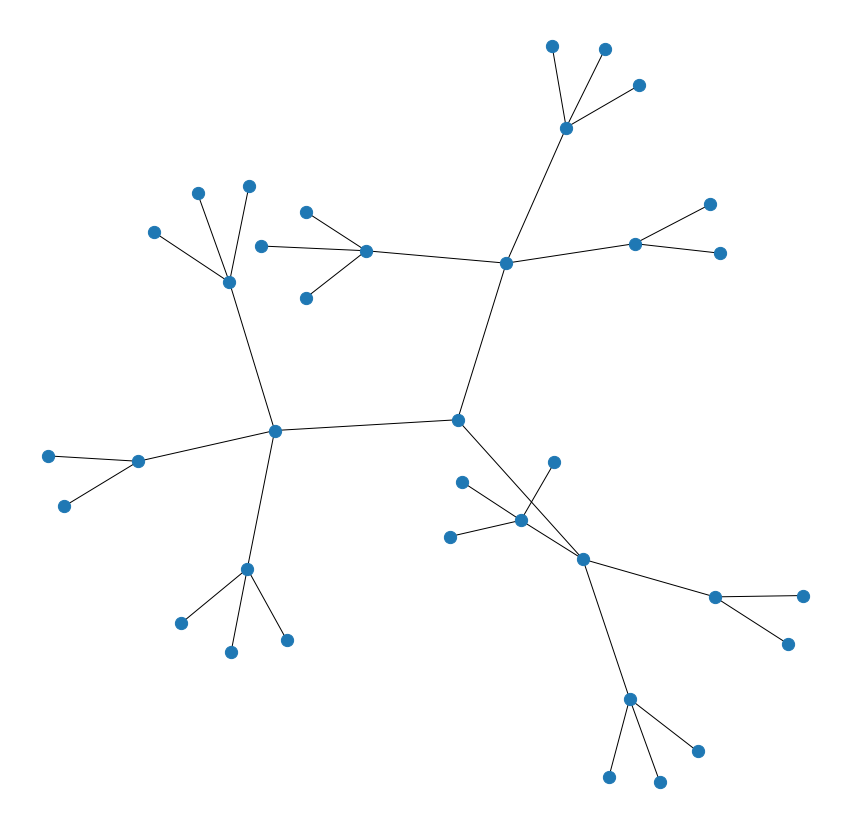

In [6]:
#displaying the normal network graph
plt.figure(figsize=(15,15))
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 150)
plt.savefig('C:/Users/akhil/Downloads/nodes_edges.png')#give your computer path

In [8]:
#creating a partition to form the communities
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

In [9]:
#displaying the no of clusters formed
from collections import Counter
cc=Counter(values)
len(cc)

7

In [10]:
#storing the rgb colors of 22 in values1 variable
values1 = ['#cc3333','#133337','#008080','#fbe5e5','#9c6eb2','#f04822','#333399','#c6e2ff','#663366','#ff004d','#6d3953','#f34e38','#fab8af','#004655','#270a04','#634640','#28285a','#ffff09','#00ffb9','#07eb96','#ccaa87','#4a2d27','#ff0066']

In [11]:
#assigning colorsto the cluster or communites
if len(values1)>=len(cc):
    for i in range(len(values)):
        values[i]=values1[values[i]]

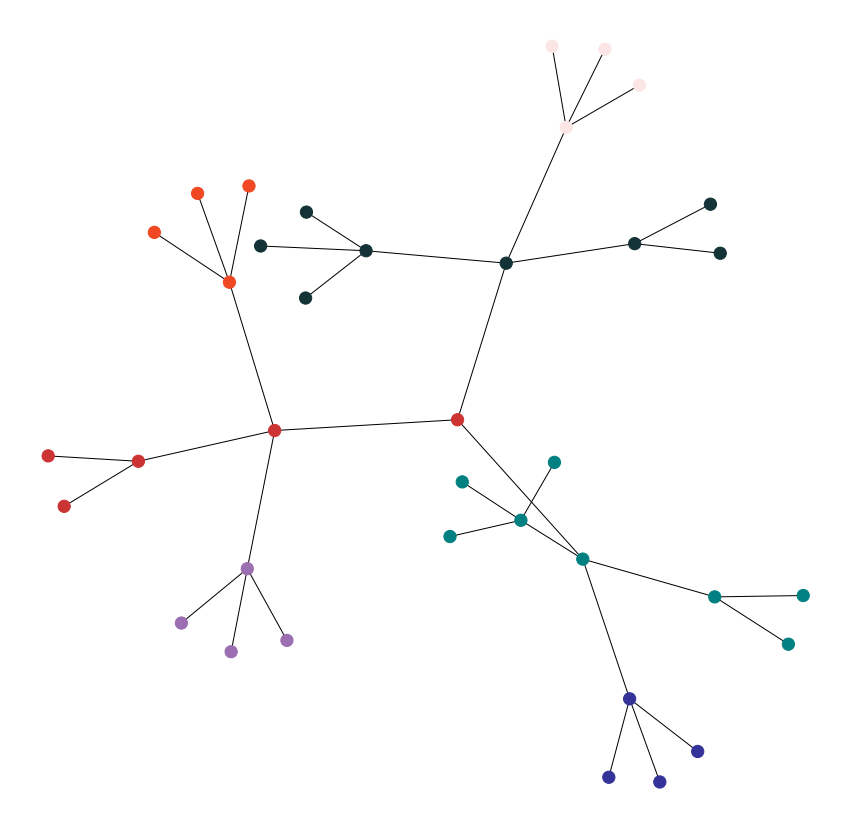

In [12]:
#ploting the cluster network graph
plt.figure(figsize=(15,15))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 150, with_labels = False)
plt.savefig('C:/Users/akhil/Downloads/nodes_edges_clusters.png')#give your computer path

In [15]:
#colors of the cluster formed above 
from colors import color
for i in range(len(cc)):
    print(color('no',values1[i],values1[i]),color('cluster'+str(i+1), values1[i]))

no cluster1
no cluster2
no cluster3
no cluster4
no cluster5
no cluster6
no cluster7


In [16]:
#finding the most influencing person or node in the cluster 
sizes=[x[1]*250 for x in G_fb.degree()]

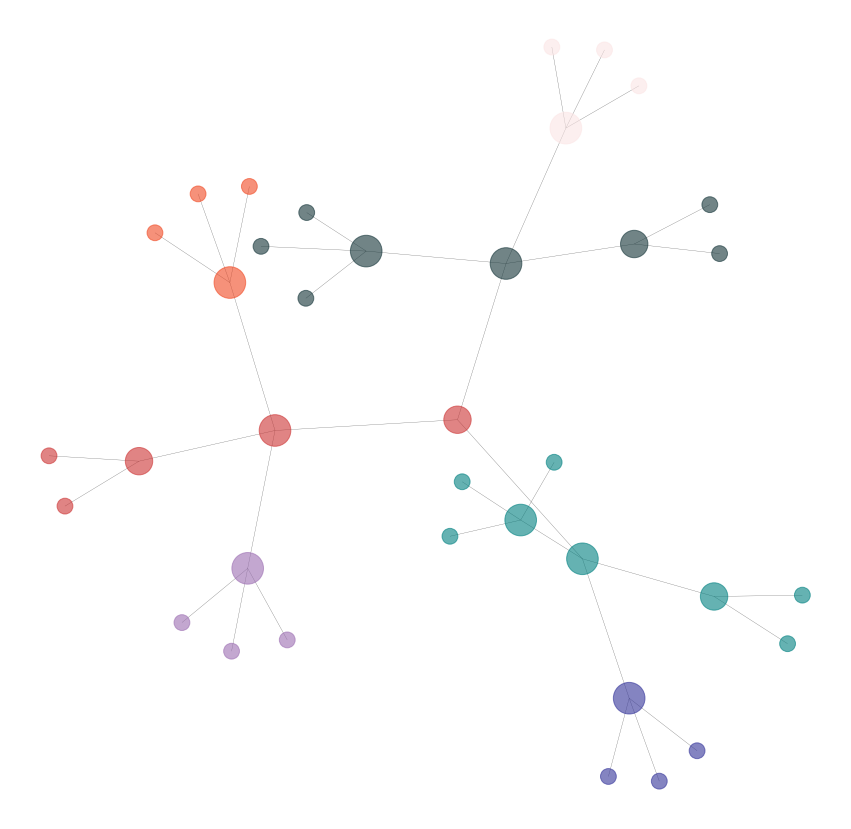

In [17]:
#ploting the most influencing in the cluster network graph
plt.figure(figsize=(15,15))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=False,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/keyplayer_in_cluster.png')#give your computer path

In [18]:
#colors of the cluster formed above
for i in range(len(cc)):
    print(color('no',values1[i],values1[i]),color('cluster'+str(i+1), values1[i]))

no cluster1
no cluster2
no cluster3
no cluster4
no cluster5
no cluster6
no cluster7


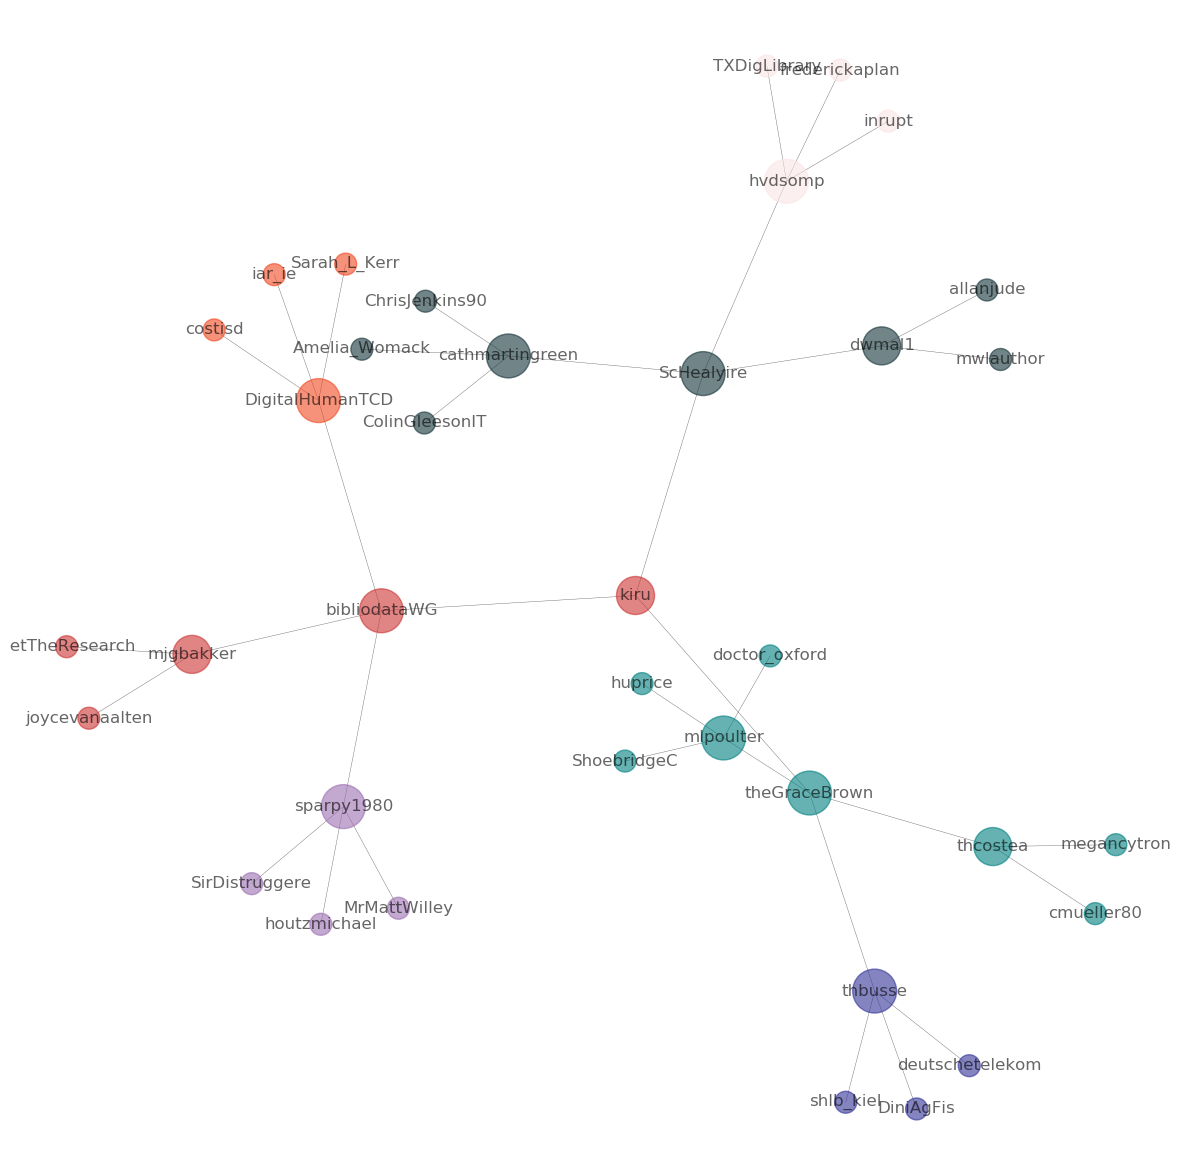

In [75]:
#ploting the most influencing in the cluster network graph with labels
plt.figure(figsize=(15,15))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=True,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/keyplayer_in_cluster_labels.png')#give your computer path

In [20]:
#colors of the cluster formed above
for i in range(len(cc)):
    print(color('no',values1[i],values1[i]),color('cluster'+str(i+1), values1[i]))

no cluster1
no cluster2
no cluster3
no cluster4
no cluster5
no cluster6
no cluster7


In [21]:
#creating circular layout for good presentation
circle_pos=nx.circular_layout(G_fb)

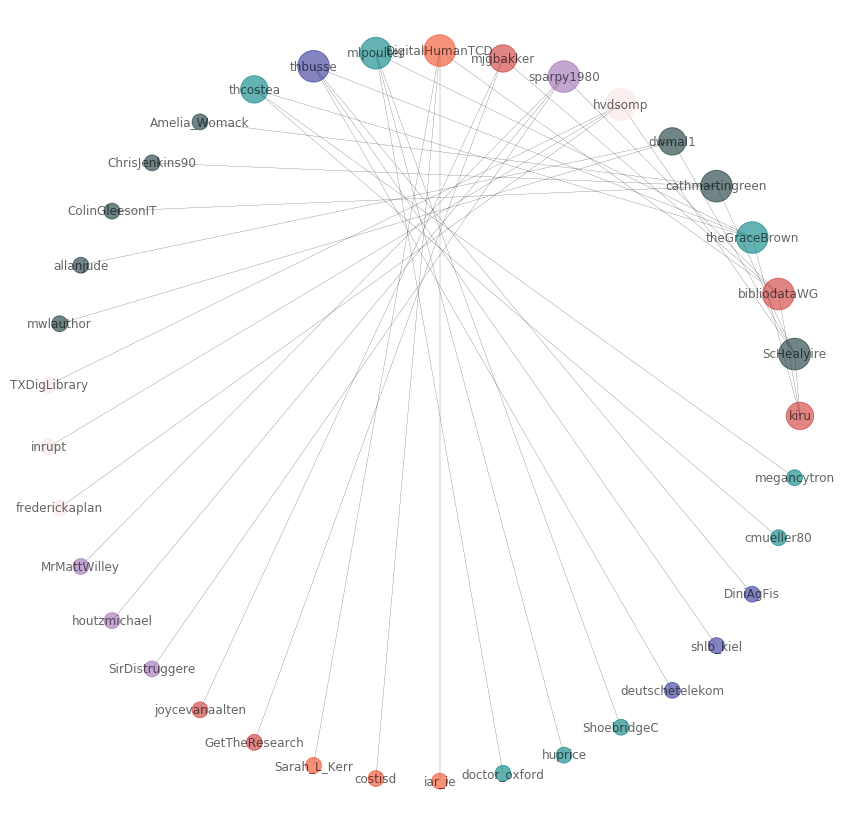

In [23]:
#ploting the most influencing in the cluster network graph with labels in circular format
plt.figure(figsize=(15,15))
plt.axis("off")
var=nx.draw_networkx(G_fb, pos = circle_pos, cmap = plt.get_cmap("jet"), node_color = values,node_size=sizes,with_labels=True,alpha=0.6,width=0.3)
plt.savefig('C:/Users/akhil/Downloads/keyplayer_circluar.png')#give your computer path

In [24]:
#colors of the cluster formed above
for i in range(len(cc)):
    print(color('no',values1[i],values1[i]),color('cluster'+str(i+1), values1[i]))

no cluster1
no cluster2
no cluster3
no cluster4
no cluster5
no cluster6
no cluster7


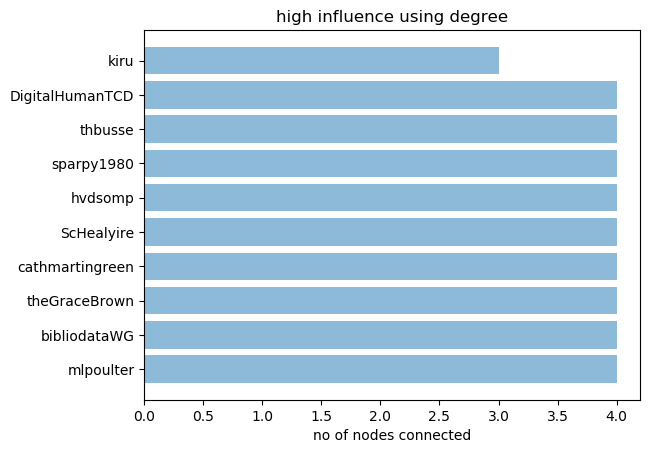

<Figure size 640x480 with 0 Axes>

In [72]:
#the below code is for displaying the graph for only people who are most influencing in the network. 
p=[]
q=[]
for x in G_fb.degree():
    p.append(x[0])
    q.append(x[1])

max_degree=pd.DataFrame(list(zip(p,q,p)),columns=['Name_index','Cent','Name'])
max_degree.set_index('Name_index', inplace=True)
max_degree1=max_degree.sort_values(by='Cent',ascending=0)
x=[]
y=[]
for i in range(10):
    x.append(max_degree1.Name[i])
    y.append(max_degree1.Cent[i])
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = x
y_pos = np.arange(len(objects))
performance = y

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('no of nodes connected')
plt.title('high influence using degree')

plt.show()
plt.savefig('C:/Users/akhil/Downloads/high_influence_people.png')#give your computer path

In [74]:

nx.shortest_path_length(G_fb,source='ScHealyire', target='thcostea')

3